In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [4]:
len(mnist.load_data())
#리턴 형식 : (  ,  ), (  ,  )

2

In [5]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [6]:
xtrain.shape #(60000, 28, 28), 데이터 차원? 28*28 크기의 이미지가 6만장
#784 차원 데이터셋
ytrain.shape #6만장 이미지가 나타내는 숫자값(0~9  )

(60000,)

In [7]:
ytrain[0]

5

In [8]:
xtrain[0].shape
print(xtrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
#xtrain 6만건에서 1만건은  validation 용으로 사용, 5만건이 학습에 사용
xval=xtrain[50000:]
yval=ytrain[50000:]
xtrain=xtrain[:50000]
ytrain=ytrain[:50000]

In [10]:
xtrain=xtrain.reshape(50000,784)/255.0
xval=xval.reshape(10000,784)/255.0
xtest=xtest.reshape(10000,784)/255.0

In [11]:
np.random.seed(1021)
np.random.choice(10,5)

array([1, 1, 1, 1, 7])

In [12]:
trainIdx=np.random.choice(50000, 700)
valIdx=np.random.choice(10000, 300)

In [13]:
#우리의 여건이 여의치 않아 5만건 -> 700건만 추출하여 모델링 할 예정
xtrain=xtrain[trainIdx]
ytrain=ytrain[trainIdx]
xval=xval[valIdx]
yval=yval[valIdx]

In [14]:
ytrain # 원핫인코딩 해야 함 ( 소프트맥스를 사용하기 위해)

array([9, 7, 5, 3, 0, 9, 9, 0, 0, 8, 2, 0, 0, 7, 2, 3, 0, 8, 5, 1, 1, 3,
       7, 9, 2, 2, 4, 4, 6, 9, 9, 7, 9, 8, 2, 6, 8, 9, 6, 9, 1, 6, 3, 2,
       6, 7, 2, 6, 0, 6, 1, 4, 7, 3, 8, 8, 4, 1, 5, 4, 1, 1, 7, 1, 7, 9,
       1, 3, 7, 5, 5, 1, 7, 6, 3, 8, 4, 6, 5, 3, 7, 9, 7, 3, 8, 3, 7, 1,
       7, 3, 5, 2, 9, 4, 2, 3, 7, 0, 2, 1, 1, 8, 0, 3, 6, 0, 0, 1, 1, 7,
       1, 3, 9, 1, 7, 2, 7, 3, 6, 1, 7, 2, 7, 6, 4, 2, 1, 8, 6, 3, 2, 3,
       1, 7, 8, 8, 1, 7, 3, 3, 8, 3, 9, 9, 4, 1, 2, 1, 0, 1, 5, 9, 0, 1,
       4, 2, 6, 9, 6, 2, 7, 2, 8, 6, 2, 1, 9, 8, 5, 7, 9, 7, 2, 9, 5, 1,
       7, 1, 0, 3, 2, 5, 7, 9, 5, 6, 8, 8, 4, 2, 4, 6, 3, 0, 4, 4, 0, 0,
       1, 3, 7, 9, 1, 5, 2, 6, 4, 6, 9, 8, 2, 5, 4, 8, 3, 5, 9, 3, 4, 2,
       7, 2, 4, 6, 7, 8, 3, 5, 0, 1, 4, 7, 2, 1, 9, 1, 8, 6, 6, 9, 2, 3,
       5, 5, 2, 1, 4, 0, 0, 8, 9, 6, 2, 6, 4, 6, 3, 0, 9, 7, 1, 3, 2, 3,
       7, 6, 2, 1, 8, 0, 4, 2, 9, 9, 6, 5, 3, 3, 4, 0, 5, 5, 7, 8, 4, 0,
       5, 3, 8, 3, 6, 6, 0, 0, 2, 9, 3, 7, 2, 3, 9,

In [14]:
# !pip install np_utils # 실행하여 설치

In [1]:
# from tensorflow import keras 
# from keras.utils import np_utils

In [15]:
ytrain=tf.keras.utils.to_categorical(ytrain) #범주형 데이터로 변환
yval=tf.keras.utils.to_categorical(yval) #범주형 데이터로 변환
ytest=tf.keras.utils.to_categorical(ytest) #범주형 데이터로 변환

In [ ]:
#모델링
model = Sequential()
model.add(Dense(2, input_dim=28*28, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#모델 최적화 함수 등 정의
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
#모델 학습
hist=model.fit(xtrain, ytrain, epochs=300, batch_size=10, 
               validation_data=(xval, yval), verbose=2)

Epoch 1/300
70/70 - 0s - loss: 2.2802 - accuracy: 0.1471 - val_loss: 2.2471 - val_accuracy: 0.1833
Epoch 2/300
70/70 - 0s - loss: 2.1841 - accuracy: 0.2386 - val_loss: 2.1690 - val_accuracy: 0.2633
Epoch 3/300
70/70 - 0s - loss: 2.0934 - accuracy: 0.2586 - val_loss: 2.1027 - val_accuracy: 0.2833
Epoch 4/300
70/70 - 0s - loss: 2.0256 - accuracy: 0.2986 - val_loss: 2.0522 - val_accuracy: 0.2967
Epoch 5/300
70/70 - 0s - loss: 1.9752 - accuracy: 0.3043 - val_loss: 2.0122 - val_accuracy: 0.2967
Epoch 6/300
70/70 - 0s - loss: 1.9314 - accuracy: 0.3243 - val_loss: 1.9742 - val_accuracy: 0.3067
Epoch 7/300
70/70 - 0s - loss: 1.8918 - accuracy: 0.3114 - val_loss: 1.9392 - val_accuracy: 0.3333
Epoch 8/300
70/70 - 0s - loss: 1.8550 - accuracy: 0.3357 - val_loss: 1.9073 - val_accuracy: 0.3400
Epoch 9/300
70/70 - 0s - loss: 1.8216 - accuracy: 0.3386 - val_loss: 1.8823 - val_accuracy: 0.3333
Epoch 10/300
70/70 - 0s - loss: 1.7925 - accuracy: 0.3486 - val_loss: 1.8538 - val_accuracy: 0.3467
Epoch 11/

Epoch 84/300
70/70 - 0s - loss: 1.1212 - accuracy: 0.5900 - val_loss: 1.4479 - val_accuracy: 0.5233
Epoch 85/300
70/70 - 0s - loss: 1.1167 - accuracy: 0.5857 - val_loss: 1.4570 - val_accuracy: 0.5333
Epoch 86/300
70/70 - 0s - loss: 1.1139 - accuracy: 0.5886 - val_loss: 1.4658 - val_accuracy: 0.5333
Epoch 87/300
70/70 - 0s - loss: 1.1126 - accuracy: 0.5943 - val_loss: 1.4505 - val_accuracy: 0.5433
Epoch 88/300
70/70 - 0s - loss: 1.1074 - accuracy: 0.5900 - val_loss: 1.4538 - val_accuracy: 0.5500
Epoch 89/300
70/70 - 0s - loss: 1.1054 - accuracy: 0.5814 - val_loss: 1.4580 - val_accuracy: 0.5433
Epoch 90/300
70/70 - 0s - loss: 1.1028 - accuracy: 0.5914 - val_loss: 1.4510 - val_accuracy: 0.5467
Epoch 91/300
70/70 - 0s - loss: 1.0986 - accuracy: 0.5943 - val_loss: 1.4633 - val_accuracy: 0.5267
Epoch 92/300
70/70 - 0s - loss: 1.0975 - accuracy: 0.6029 - val_loss: 1.4452 - val_accuracy: 0.5433
Epoch 93/300
70/70 - 0s - loss: 1.0935 - accuracy: 0.6014 - val_loss: 1.4590 - val_accuracy: 0.5367


Epoch 166/300
70/70 - 0s - loss: 0.9481 - accuracy: 0.6514 - val_loss: 1.5043 - val_accuracy: 0.5233
Epoch 167/300
70/70 - 0s - loss: 0.9470 - accuracy: 0.6543 - val_loss: 1.5241 - val_accuracy: 0.5200
Epoch 168/300
70/70 - 0s - loss: 0.9432 - accuracy: 0.6643 - val_loss: 1.5185 - val_accuracy: 0.5167
Epoch 169/300
70/70 - 0s - loss: 0.9424 - accuracy: 0.6671 - val_loss: 1.5192 - val_accuracy: 0.5200
Epoch 170/300
70/70 - 0s - loss: 0.9422 - accuracy: 0.6614 - val_loss: 1.5051 - val_accuracy: 0.5167
Epoch 171/300
70/70 - 0s - loss: 0.9392 - accuracy: 0.6643 - val_loss: 1.5351 - val_accuracy: 0.5333
Epoch 172/300
70/70 - 0s - loss: 0.9391 - accuracy: 0.6571 - val_loss: 1.5186 - val_accuracy: 0.5200
Epoch 173/300
70/70 - 0s - loss: 0.9360 - accuracy: 0.6629 - val_loss: 1.5163 - val_accuracy: 0.5000
Epoch 174/300
70/70 - 0s - loss: 0.9349 - accuracy: 0.6671 - val_loss: 1.5304 - val_accuracy: 0.5100
Epoch 175/300
70/70 - 0s - loss: 0.9349 - accuracy: 0.6643 - val_loss: 1.5280 - val_accurac

Epoch 248/300
70/70 - 0s - loss: 0.8422 - accuracy: 0.7000 - val_loss: 1.5831 - val_accuracy: 0.5167
Epoch 249/300
70/70 - 0s - loss: 0.8416 - accuracy: 0.7029 - val_loss: 1.5905 - val_accuracy: 0.5100
Epoch 250/300
70/70 - 0s - loss: 0.8413 - accuracy: 0.7000 - val_loss: 1.6053 - val_accuracy: 0.5167
Epoch 251/300
70/70 - 0s - loss: 0.8383 - accuracy: 0.7000 - val_loss: 1.6039 - val_accuracy: 0.5100
Epoch 252/300
70/70 - 0s - loss: 0.8376 - accuracy: 0.6914 - val_loss: 1.6018 - val_accuracy: 0.5200
Epoch 253/300
70/70 - 0s - loss: 0.8378 - accuracy: 0.7043 - val_loss: 1.5980 - val_accuracy: 0.5133
Epoch 254/300
70/70 - 0s - loss: 0.8377 - accuracy: 0.6929 - val_loss: 1.6103 - val_accuracy: 0.5100
Epoch 255/300
70/70 - 0s - loss: 0.8338 - accuracy: 0.6886 - val_loss: 1.5923 - val_accuracy: 0.5067
Epoch 256/300
70/70 - 0s - loss: 0.8325 - accuracy: 0.6929 - val_loss: 1.5971 - val_accuracy: 0.5233
Epoch 257/300
70/70 - 0s - loss: 0.8327 - accuracy: 0.6986 - val_loss: 1.5914 - val_accurac

In [ ]:
# hist.history['loss']
# hist.history['val_loss']
#hist.history['accuracy']
#hist.history['val_accuracy']

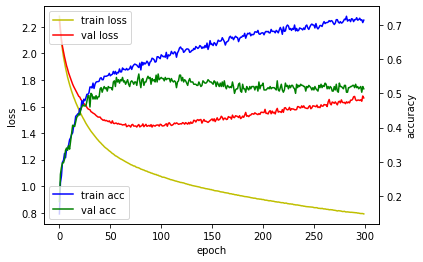

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')